In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import torch

In [ ]:
label_encoder = LabelEncoder()

X_train = pd.read_pickle('X_train.pkl')
y_train = pd.read_pickle('y_train.pkl')
X_test = pd.read_pickle('X_test.pkl')
y_test = pd.read_pickle('y_test.pkl')

y_train = label_encoder.fit_transform(y_train.values)
y_test = label_encoder.fit_transform(y_test.values)


In [ ]:
# pytorch tensorization
X_train = torch.tensor(X_train.values, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)

X_test = torch.tensor(X_test.values, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

# split training data into train and validation set
train_size = int(0.7 * len(X_train))
val_size = len(X_train) - train_size
train_X, train_y = X_train[:train_size], y_train[:train_size]
val_X, val_y = X_train[train_size:], y_train[train_size:]


print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_train:  torch.Size([36594, 23])
y_train:  torch.Size([36594])
X_test:  torch.Size([9149, 23])
y_test:  torch.Size([9149])


In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

## DNN

In [ ]:
class MulticlassClassificationModel(nn.Module):

  # Architecture of neural network
  def __init__(self, input_size, hidden_size, output_size):
    super(MulticlassClassificationModel, self).__init__()
    # architecture of 1st hidden layer
    self.layer1 = nn.Linear(input_size, hidden_size)
    self.bn1 = nn.BatchNorm1d(hidden_size) # pre_activation
    self.dropout = nn.Dropout(0.5) # after post_activation
    # architecture of 2nd hidden layer
    self.layer2 = nn.Linear(hidden_size, hidden_size)
    self.bn2 = nn.BatchNorm1d(hidden_size) # pre_activation
    self.droupout = nn.Dropout(0.5) # post_activation
    # architecture of 3rd hidden layer
    self.layer3 = nn.Linear(hidden_size, hidden_size)
    self.bn3 = nn.BatchNorm1d(hidden_size) #pre_activation
    # architecture of output layer
    self.output_layer = nn.Linear(hidden_size, output_size)

  # Feedforward Network
  def forward(self, x):
    # activation to batch normalization, FCN to 1st hidden from input layer
    x = torch.tanh(self.bn1(self.layer1(x))) # post-activation
    x = self.dropout(x)
    # activation to batch normalization, FCN to 2nd hidden from 1st hidden layer
    x = torch.tanh(self.bn2(self.layer2(x))) # post-activation
    x = self.dropout(x)
    # activation to batch normalization, FCN at 3rd hidden from 2nd hidden layer
    x = torch.tanh(self.bn3(self.layer3(x))) # post-activation
    # activation to FCN to output from 3rd hidden layer
    return F.softmax(self.output_layer(x), dim=1)



In [ ]:
def train_model(model, train_loader, val_loader, optimizer, criterion, epochs=10):
    train_losses, val_losses = [], []
    for epoch in range(epochs):

        # training routine
        model.train()
        train_loss = 0.0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            output = model(X_batch)
            loss = criterion(output, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        # validation routine
        val_loss = 0.0
        model.eval()
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                output = model(X_batch)
                loss = criterion(output, y_batch)
                val_loss += loss.item()

        train_loss /= len(train_loader)
        val_loss /= len(val_loader)
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        print(f'Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

      # tracking model parameter for every epoch
        model_path = f'{epoch+1}.pt'
        torch.save(model.state_dict(), model_path)

    return train_losses, val_losses


In [ ]:
# number of neural nodes
input_size = X_train.shape[1]
hidden_size = 128 # hyperparamter
output_size = len(torch.unique(y_train))

# instantiation of neural network class
model = MulticlassClassificationModel(input_size, hidden_size, output_size)

# loss function criterion and optimizer
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

# DataLoader for training set, validation set
batch_size = 64
train_loader = DataLoader(TensorDataset(train_X, train_y), batch_size=batch_size, shuffle=False)
val_loader = DataLoader(TensorDataset(val_X, val_y), batch_size=batch_size, shuffle=False)

Epoch 1, Train Loss: 1.0127, Val Loss: 1.1653
Epoch 2, Train Loss: 0.9957, Val Loss: 1.0507
Epoch 3, Train Loss: 0.9899, Val Loss: 1.1780
Epoch 4, Train Loss: 0.9858, Val Loss: 1.1580
Epoch 5, Train Loss: 0.9835, Val Loss: 1.1900
Epoch 6, Train Loss: 0.9792, Val Loss: 1.3096
Epoch 7, Train Loss: 0.9773, Val Loss: 1.2786
Epoch 8, Train Loss: 0.9678, Val Loss: 1.3082
Epoch 9, Train Loss: 0.9620, Val Loss: 1.3083
Epoch 10, Train Loss: 0.9588, Val Loss: 1.3080
Epoch 11, Train Loss: 0.9533, Val Loss: 1.3030
Epoch 12, Train Loss: 0.9456, Val Loss: 1.3043
Epoch 13, Train Loss: 0.9431, Val Loss: 1.3075
Epoch 14, Train Loss: 0.9397, Val Loss: 1.2645
Epoch 15, Train Loss: 0.9367, Val Loss: 1.3095
Epoch 16, Train Loss: 0.9365, Val Loss: 1.2085
Epoch 17, Train Loss: 0.9323, Val Loss: 1.2839
Epoch 18, Train Loss: 0.9317, Val Loss: 1.3037
Epoch 19, Train Loss: 0.9302, Val Loss: 1.3089
Epoch 20, Train Loss: 0.9293, Val Loss: 1.2926
Epoch 21, Train Loss: 0.9267, Val Loss: 1.3054
Epoch 22, Train Loss: 

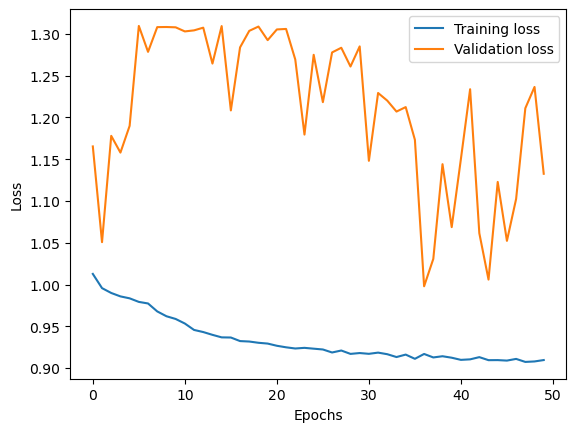

In [ ]:
# train neural network by launching backpropagation
train_losses, val_losses = train_model(model, train_loader, val_loader, optimizer, criterion, epochs=50)

# visualization of error curve
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Gate Recurrent Unit

In [ ]:
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(GRUModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # GRU Layer
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)

        # Fully connected Layer
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x, hidden):
        # x shape: [batch_size, seq_len, features]
        # hidden shape: [num_layers, batch_size, hidden_size]
        out, hidden = self.gru(x, hidden)

        # Convert output to be [batch_size*seq_len, hidden_size]
        out = out.reshape(-1, self.hidden_size)

        # Get the final output
        out = self.fc(out)

        return out, hidden

    def init_hidden(self, batch_size):
        # Initialize hidden state with zeros
        hidden = torch.zeros(self.num_layers, batch_size, self.hidden_size)
        return hidden

In [ ]:
def train_rnn_model(model, train_loader, val_loader, optimizer, criterion, epochs=10):
    train_losses, val_losses = [], []
    for epoch in range(epochs):
        # training routine
        model.train()
        train_loss = 0.0

        for X_batch, y_batch in train_loader:
            X_batch = X_batch.unsqueeze(1)
            batch_size = X_batch.size(0)
            hidden = model.init_hidden(batch_size)  # 배치 크기에 맞는 숨겨진 상태 초기화

            optimizer.zero_grad()
            output, hidden = model(X_batch, hidden)
            loss = criterion(output, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        # validation routine
        val_loss = 0.0
        model.eval()
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                X_batch = X_batch.unsqueeze(1)
                batch_size = X_batch.size(0)
                hidden = model.init_hidden(batch_size)  # 배치 크기에 맞는 숨겨진 상태 초기화

                output, hidden = model(X_batch, hidden)
                loss = criterion(output, y_batch)
                val_loss += loss.item()

        train_loss /= len(train_loader)
        val_loss /= len(val_loader)
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        print(f'Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

    return train_losses, val_losses



In [ ]:
# number of neural nodes
input_size = X_train.shape[1]
hidden_size = 20 # Number of hidden units in the GRU
output_size = len(torch.unique(y_train))
num_layers = 1   # Number of stacked GRU layers

# instantiation of Gate Recurrent Unit
model = GRUModel(input_size, hidden_size, output_size, num_layers)

# loss function criterion and optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# DataLoader for training set, validation set
batch_size = 64
train_loader = DataLoader(TensorDataset(train_X, train_y), batch_size=batch_size, shuffle=False)
val_loader = DataLoader(TensorDataset(val_X, val_y), batch_size=batch_size, shuffle=False)

Epoch 1, Train Loss: 0.9603, Val Loss: 0.9417
Epoch 2, Train Loss: 0.9373, Val Loss: 0.9380
Epoch 3, Train Loss: 0.9341, Val Loss: 0.9345
Epoch 4, Train Loss: 0.9318, Val Loss: 0.9325
Epoch 5, Train Loss: 0.9299, Val Loss: 0.9311
Epoch 6, Train Loss: 0.9283, Val Loss: 0.9298
Epoch 7, Train Loss: 0.9272, Val Loss: 0.9290
Epoch 8, Train Loss: 0.9263, Val Loss: 0.9284
Epoch 9, Train Loss: 0.9254, Val Loss: 0.9281
Epoch 10, Train Loss: 0.9244, Val Loss: 0.9279
Epoch 11, Train Loss: 0.9237, Val Loss: 0.9276
Epoch 12, Train Loss: 0.9231, Val Loss: 0.9273
Epoch 13, Train Loss: 0.9227, Val Loss: 0.9271
Epoch 14, Train Loss: 0.9222, Val Loss: 0.9269
Epoch 15, Train Loss: 0.9219, Val Loss: 0.9266
Epoch 16, Train Loss: 0.9215, Val Loss: 0.9263
Epoch 17, Train Loss: 0.9212, Val Loss: 0.9261
Epoch 18, Train Loss: 0.9209, Val Loss: 0.9259
Epoch 19, Train Loss: 0.9206, Val Loss: 0.9257
Epoch 20, Train Loss: 0.9204, Val Loss: 0.9255
Epoch 21, Train Loss: 0.9201, Val Loss: 0.9253
Epoch 22, Train Loss: 

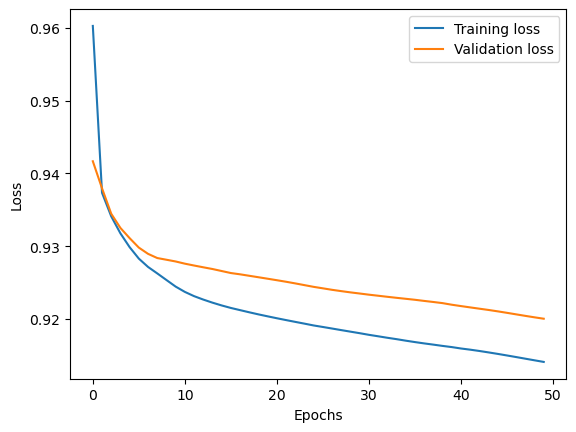

In [ ]:
# train neural network by launching backpropagation
train_losses, val_losses = train_rnn_model(model, train_loader, val_loader, optimizer, criterion, epochs=50)

# visualization of error curve
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()